### Naive Bayes Classifier


In [146]:
# import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline


In [147]:
# load the dataset
file_path = ".//datasets/adult.csv"
df = pd.read_csv(file_path)
df.head(2)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### EDA


In [148]:
df.shape

(32560, 15)

In [149]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The column name is not properly aligned so need change it


In [150]:
# rename the columns

col_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income",
]

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [151]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [152]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There is no missing values are there.Lets confirm this ..


#### Split into categorical and numerical variables


##### Categorical variables


In [153]:
# list comprehension for getting the categorical variables
cat_variables = [var for var in df.columns if df[var].dtype == "O"]

# length of categorical variables
print(f" There are {len(cat_variables)} categorical variables ")

cat_variables

 There are 9 categorical variables 


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [154]:
df[cat_variables].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [155]:
# check for missing values
df[cat_variables].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [156]:
# check the values count
for var in cat_variables:

    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [157]:
# frequency distribution
for var in cat_variables:
    print(df[var].value_counts() / float(len(df)))

workclass
Private             0.697052
Self-emp-not-inc    0.078041
Local-gov           0.064281
?                   0.056388
State-gov           0.039834
Self-emp-inc        0.034275
Federal-gov         0.029484
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322512
Some-college    0.223925
Bachelors       0.164435
Masters         0.052918
Assoc-voc       0.042445
11th            0.036087
Assoc-acdm      0.032770
10th            0.028655
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013299
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459951
Never-married            0.328071
Divorced                 0.136456
Separated                0.031480
Widowed                  0.030498
Married-spouse-absent    0.012838
Married-AF-spouse        0.000706
Name: coun

         Workclass
         Occupation
         Native country

         these col contin null values in the "?" variable


In [158]:
# workclass
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [159]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [160]:
# Remove leading and trailing whitespace from the values in the 'workclass' column
df["workclass"] = df["workclass"].str.strip()


# replace the null values with nan
df["workclass"].replace("?", np.nan, inplace=True)

C:\Users\Harikeerthan\AppData\Local\Temp\ipykernel_18356\3776739215.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["workclass"].replace("?", np.nan, inplace=True)


In [161]:
# check
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

now the "?" values are changed as "NaN" . Same apply it to others


In [162]:
# occupation
df["occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [163]:
# Strip leading and trailing spaces from all values in the 'workclass' column
df["occupation"] = df["occupation"].str.strip()
# Replace '?' with NaN
df["occupation"].replace("?", np.nan, inplace=True)

C:\Users\Harikeerthan\AppData\Local\Temp\ipykernel_18356\1727724021.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["occupation"].replace("?", np.nan, inplace=True)


In [164]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [165]:
# native country
df["native_country"].value_counts()

native_country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [166]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [167]:
# Strip leading and trailing spaces from all values in the 'workclass' column
df["native_country"] = df["native_country"].str.strip()

# Replace '?' with NaN
df["native_country"].replace("?", np.nan, inplace=True)

df["native_country"].value_counts()

C:\Users\Harikeerthan\AppData\Local\Temp\ipykernel_18356\1493263770.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["native_country"].replace("?", np.nan, inplace=True)


native_country
United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [168]:
# check the missing categorical variables
df[cat_variables].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that workclass, occupation and native_country variable contains missing values


In [169]:
# check  cardinality
for var in cat_variables:
    print(var, "contains", len(df[var].unique()), "labels")

workclass contains 9 labels
education contains 16 labels
marital_status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native_country contains 42 labels
income contains 2 labels


We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.


#### Explore Numerical variables


#### Find numerical variables


In [170]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype != "O"]

print("There are {} numerical variables\n".format(len(numerical)))

print("The numerical variables are :", numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [171]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [172]:
# checking for missing values
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

There is no null values in the categorical variables


#### Declare feature vector and target variable


In [173]:
X = df.drop(["income"], axis=1)

y = df["income"]

#### Train test split


In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [175]:
X_train.shape, X_test.shape

((22792, 14), (9768, 14))

#### Feature engineering


In [176]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [177]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == "O"]

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [178]:
# display numerical  variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != "O"]

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

#### Engineering the missing values in categorical values


In [179]:
X_train[categorical].isnull().sum()

workclass         1304
education            0
marital_status       0
occupation        1308
relationship         0
race                 0
sex                  0
native_country     416
dtype: int64

In [180]:
# print the categorical variables  with missing data
for var in categorical:
    if X_train[var].isnull().mean() > 0:
        print(var, (X_train[var].isnull().mean()))

workclass 0.057213057213057215
occupation 0.05738855738855739
native_country 0.018252018252018252


In [181]:
# impute missing categorical value with most frequent value (mode)
for df2 in [X_train, X_test]:
    df2["workclass"].fillna(X_train["workclass"].mode()[0], inplace=True)
    df2["occupation"].fillna(X_train["occupation"].mode()[0], inplace=True)
    df2["native_country"].fillna(X_train["native_country"].mode()[0], inplace=True)

C:\Users\Harikeerthan\AppData\Local\Temp\ipykernel_18356\2837659548.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["workclass"].fillna(X_train["workclass"].mode()[0], inplace=True)
C:\Users\Harikeerthan\AppData\Local\Temp\ipykernel_18356\2837659548.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [182]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [183]:
# check in the test cat variables
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [184]:
# check missing values in the X_train

print(X_train.isnull().sum())

print(X_test.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


#### Encode the categorical variables


In [185]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [186]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States


In [187]:
# category encoders
import category_encoders as ce

In [188]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [189]:
# encode remaining variables with one hot encoding

encoder = ce.OneHotEncoder(
    cols=[
        "workclass",
        "education",
        "marital_status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "native_country",
    ]
)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [190]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
20721,32,1,0,0,0,0,0,0,0,343872,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,61778,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,108495,...,0,0,0,0,0,0,0,0,0,0


In [191]:
X_train.shape

(22792, 105)

We can see that from the initial 14 columns, we now 105 columns


In [192]:
# check for X_test
X_test.shape

(9768, 105)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.


#### Feature Scaling


In [193]:
cols = X_train.columns

Robust Scaler is a method used for scaling features to be within a specific range or distribution. It is particularly useful when dealing with datasets that contain outliers.

The main purpose of Robust Scaler is to scale features so that they are more robust to the presence of outliers. It does this by removing the median and scaling the data according to the interquartile range (IQR) instead of the mean and standard deviation.

Here's how Robust Scaler works:

- Calculate the median and the interquartile range (IQR) for each feature.
- Subtract the median from each value.
- Scale the feature by dividing by the IQR.


In [194]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [195]:
# make the X_train and X_test as the dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [196]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.374471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.066379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.582591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.974966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.585881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Model training


In [197]:
# gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

#### Predict the results


In [198]:
y_pred = gnb.predict(X_test)

y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

#### Check accuracy score


In [199]:
from sklearn.metrics import accuracy_score

print("Model accuracy  score: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accuracy  score: 0.8164


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.


##### Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.


In [200]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [201]:
print(
    "Training-set accuracy score: {0:0.4f}".format(
        accuracy_score(y_train, y_pred_train)
    )
)

Training-set accuracy score: 0.8089


In [202]:
# print the scores on training and test set
print("Training set score : {:.4f}".format(gnb.score(X_train, y_train)))

print("Test set score: {:.4f}".format(gnb.score(X_test, y_test)))

Training set score : 0.8089
Test set score: 0.8164


The training-set accuracy score is 0.8089 while the test-set accuracy to be 0.8164. These two values are quite comparable. So, there is no sign of overfitting.


#### Compare model accuracy with null accuracy

So, the model accuracy is 0.8164. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.


In [203]:
# check clasd distribution in test set
y_test.value_counts()

income
<=50K    7454
>50K     2314
Name: count, dtype: int64

In [204]:
# check the null accuracy score
null_accuracy = 7454 / (7454 + 2362)


print("Null accuracy score: {0:0.4f}".format(null_accuracy))

Null accuracy score: 0.7594


We can see that our model accuracy score is 0.8164 but null accuracy score is 0.7594. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.


#### Confusion Matrix


In [205]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix\n\n", cm)

print("\nTrue Positives(TP) = ", cm[0, 0])

print("\nTrue Negatives(TN) = ", cm[1, 1])

print("\nFalse Positives(FP) = ", cm[0, 1])

print("\nFalse Negatives(FN) = ", cm[1, 0])

Confusion matrix

 [[6105 1349]
 [ 444 1870]]

True Positives(TP) =  6105

True Negatives(TN) =  1870

False Positives(FP) =  1349

False Negatives(FN) =  444


<Axes: >

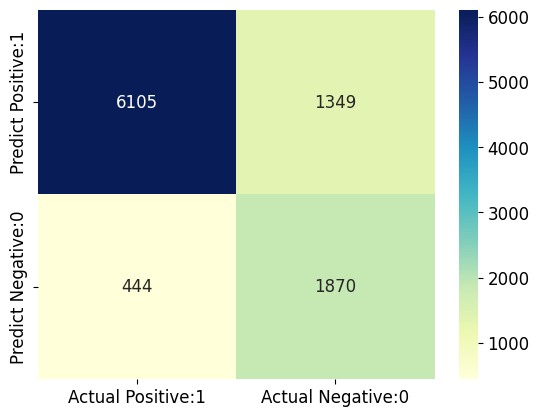

In [206]:
# visualize the heatmap

cm_matrix = pd.DataFrame(
    data=cm,
    columns=["Actual Positive:1", "Actual Negative:0"],
    index=["Predict Positive:1", "Predict Negative:0"],
)

sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="YlGnBu")

#### Classification Metrics

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.


In [207]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.82      0.87      7454
        >50K       0.58      0.81      0.68      2314

    accuracy                           0.82      9768
   macro avg       0.76      0.81      0.77      9768
weighted avg       0.85      0.82      0.83      9768



#### Classification Accuracy


In [208]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [209]:
# FUNCTION FOR CLASSIFICATION ACCURACY


def classfication_metrics(TP, TN, FP, FN):

    # classification accuracy
    classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

    # print classification error
    classification_error = (FP + FN) / float(TP + TN + FP + FN)

    # print precision score
    precision = TP / float(TP + FP)

    # recall
    recall = TP / float(TP + FN)

    # true postive rate
    true_positive_rate = TP / float(TP + FN)

    # false positive rate
    false_positive_rate = FP / float(FP + TN)

    # specificity
    specificity = TN / (TN + FP)

    print("Classification accuracy : {0:0.4f}".format(classification_accuracy))
    print("Classification error : {0:0.4f}".format(classification_error))
    print("Precision : {0:0.4f}".format(precision))
    print("Recall or Sensitivity : {0:0.4f}".format(recall))
    print("True Positive Rate : {0:0.4f}".format(true_positive_rate))
    print("False Positive Rate : {0:0.4f}".format(false_positive_rate))
    print("Specificity : {0:0.4f}".format(specificity))

In [210]:
classfication_metrics(TP, TN, FP, FN)

Classification accuracy : 0.8164
Classification error : 0.1836
Precision : 0.8190
Recall or Sensitivity : 0.9322
True Positive Rate : 0.9322
False Positive Rate : 0.4191
Specificity : 0.5809


#### Calculate the class probabilities


In [211]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[5.65187154e-02, 9.43481285e-01],
       [9.99977898e-01, 2.21021023e-05],
       [9.99998716e-01, 1.28437690e-06],
       [9.99999999e-01, 1.14553388e-09],
       [9.99844406e-01, 1.55594116e-04],
       [1.45695734e-01, 8.54304266e-01],
       [9.99999934e-01, 6.55033777e-08],
       [9.99534858e-01, 4.65142119e-04],
       [9.85081734e-01, 1.49182659e-02],
       [9.99999992e-01, 8.45327133e-09]])

In [212]:
# store the probabilities in the dataframe
y_pred_prob_df = pd.DataFrame(
    data=y_pred_prob, columns=["Prob of - <= 50k", "Prob of - >50k"]
)

y_pred_prob_df

,Prob of - <= 50k,Prob of - >50k
0,0.056519,9.434813e-01
1,0.999978,2.210210e-05
2,0.999999,1.284377e-06
3,1.000000,1.145534e-09
4,0.999844,1.555941e-04
5,0.145696,8.543043e-01
6,1.000000,6.550338e-08
7,0.999535,4.651421e-04
8,0.985082,1.491827e-02
9,1.000000,8.453271e-09


In [213]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([9.43481285e-01, 2.21021023e-05, 1.28437690e-06, 1.14553388e-09,
       1.55594116e-04, 8.54304266e-01, 6.55033777e-08, 4.65142119e-04,
       1.49182659e-02, 8.45327133e-09])

In [214]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

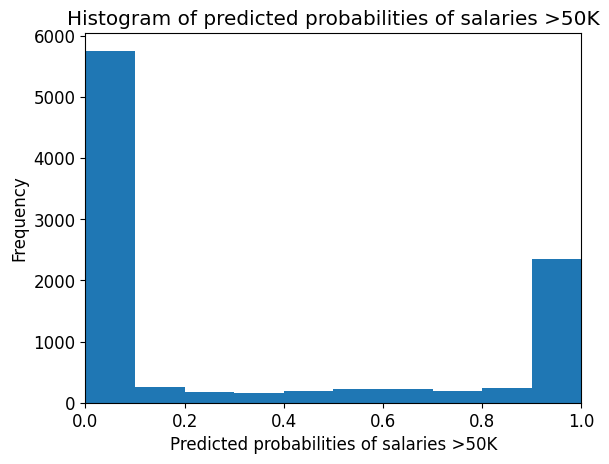

In [215]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams["font.size"] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins=10)


# set the title of predicted probabilities
plt.title("Histogram of predicted probabilities of salaries >50K")


# set the x-axis limit
plt.xlim(0, 1)


# set the title
plt.xlabel("Predicted probabilities of salaries >50K")
plt.ylabel("Frequency")

#### Observation:

      -> From the above graph ,Majority of observations predcit that the salaries will be <=50K.

      -> So, these small number of observations predict that the salaries will be >50K.


#### ROC - AUC


c:\Users\Harikeerthan\Machine Learning\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


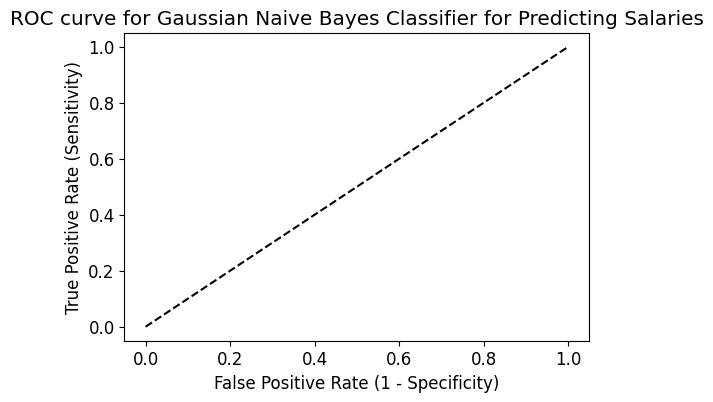

In [219]:
# plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=">50k")

plt.figure(figsize=(6, 4))

plt.plot([0, 1], [0, 1], "k--")

plt.rcParams["font.size"] = 12

plt.title("ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries")

plt.xlabel("False Positive Rate (1 - Specificity)")

plt.ylabel("True Positive Rate (Sensitivity)")

plt.show()

In [220]:
# compute ROC curve

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print("ROC AUC : {:.4f}".format(ROC_AUC))

ROC AUC : 0.8986


#### Interpretation

- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.


In [221]:
# calculate cross validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(
    gnb, X_train, y_train, cv=5, scoring="roc_auc"
).mean()

print("Cross validated ROC AUC : {:.4f}".format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8916


In [222]:
# Apply 10 fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring="accuracy")

print("Cross-validation scores:{}".format(scores))

# compute Average cross-validation score

print("Average cross-validation score: {:.4f}".format(scores.mean()))

Cross-validation scores:[0.81008772 0.81622807 0.80298376 0.8095656  0.78850373 0.8174638
 0.81790259 0.80342255 0.8174638  0.80254498]
Average cross-validation score: 0.8086
